In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_CNN = pd.read_csv("data/SimpleCNN/metrics.csv")
df_CNN_c = pd.read_csv("data/SimpleCNN_compress/metrics.csv")
df_mlp_c = pd.read_csv("data/SimpleMLP_compress/metrics.csv")
df_mlp = pd.read_csv("data/SimpleMLP/metrics.csv")
df_seq2pp = pd.read_csv("data/seq2pp/metrics.csv")
df_cnn_no_pooling = pd.read_csv("data/SimpleCNN_no_pooling/metrics.csv")

In [3]:
# 1. Agregar columna para identificar el origen/modelo
df_CNN = df_CNN.assign(model="Encoder")
df_CNN_c = df_CNN_c.assign(model="Encoder")
df_mlp = df_mlp.assign(model="MLP")
df_mlp_c = df_mlp_c.assign(model="MLP")
df_seq2pp = df_seq2pp.assign(model="seq2pp")
df_cnn_no_pooling = df_cnn_no_pooling.assign(model="SimpleCNN")

# 2. Concatenar todos los DataFrames
df_all = pd.concat(
    [df_CNN, df_CNN_c, df_mlp, df_mlp_c, df_seq2pp, df_cnn_no_pooling],
    axis=0,
    ignore_index=True,
    sort=False,  # sort=False para mantener el orden original de las columnas
)

cols = ["model"] + [c for c in df_all.columns if c != "model"]
df_all = df_all[cols]

In [4]:
df_all

,model,run_name,exp,run,arc_features,arc_num_conv,arc_latent_volume,arc_num_params,train_loss,valid_loss,...,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq,arc_skip,arc_encoder_blocks,arc_kernels
0,Encoder,nc2_f16_32_64,SimpleCNN,nc2_f16_32_64,"[16, 32, 64]",2.0,2048.0,287009,0.014548,0.145848,...,0.901115,0.981020,0.801948,0.888887,0.0,0.0,0.0,NaN,NaN,NaN
1,Encoder,nc2_f8_32_64,SimpleCNN,nc2_f8_32_64,"[8, 32, 64]",2.0,2048.0,285521,0.011068,0.128251,...,0.904229,0.985725,0.825287,0.893458,0.0,0.0,0.0,NaN,NaN,NaN
2,Encoder,nc2_f8_16_64,SimpleCNN,nc2_f8_16_64,"[8, 16, 64]",2.0,2048.0,279665,0.013865,0.132113,...,0.923999,0.981864,0.816265,0.913555,0.0,0.0,0.0,NaN,NaN,NaN
3,Encoder,nc2_f8_16_32,SimpleCNN,nc2_f8_16_32,"[8, 16, 32]",2.0,1024.0,137617,0.012824,0.145363,...,0.904306,0.983277,0.801237,0.891113,0.0,0.0,0.0,NaN,NaN,NaN
4,Encoder,nc2_f4_32_64,SimpleCNN,nc2_f4_32_64,"[4, 32, 64]",2.0,2048.0,284921,0.011339,0.140335,...,0.906359,0.985588,0.807790,0.894622,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,SimpleCNN,scnn_k_3_f4_4,SimpleCNN_no_pooling,scnn_k_3_f4_4,"[4, 4]",NaN,NaN,125,0.154327,0.176821,...,0.689735,0.725142,0.638993,0.652711,0.0,0.0,0.0,NaN,NaN,"[3, 3]"
346,SimpleCNN,scnn_k_3_f32,SimpleCNN_no_pooling,scnn_k_3_f32,[32],NaN,NaN,513,0.167832,0.177714,...,0.700209,0.684181,0.630701,0.656187,0.0,0.0,0.0,NaN,NaN,[[3]]
347,SimpleCNN,scnn_k_3_f16,SimpleCNN_no_pooling,scnn_k_3_f16,[16],NaN,NaN,257,0.168014,0.174452,...,0.684157,0.683487,0.629553,0.648153,0.0,0.0,0.0,NaN,NaN,[[3]]
348,SimpleCNN,scnn_k_3_f8,SimpleCNN_no_pooling,scnn_k_3_f8,[8],NaN,NaN,129,0.167813,0.172793,...,0.663970,0.682723,0.630660,0.639505,0.0,0.0,0.0,NaN,NaN,[[3]]


Estadísticas de train_Accuracy


,count,mean,std,50%,min,max
model,,,,,,
Encoder,88.0,0.975739,0.023385,0.981002,0.826692,0.990199
MLP,38.0,0.856273,0.054038,0.863983,0.659956,0.937200
SimpleCNN,88.0,0.843930,0.067197,0.858572,0.680818,0.942070
seq2pp,136.0,0.873821,0.076843,0.891428,0.680818,0.974099


Estadísticas de valid_Accuracy


,count,mean,std,50%,min,max
model,,,,,,
Encoder,88.0,0.812242,0.016274,0.813139,0.733423,0.849028
MLP,38.0,0.740414,0.042969,0.733895,0.610245,0.821614
SimpleCNN,88.0,0.712316,0.031570,0.719965,0.628404,0.756293
seq2pp,136.0,0.741698,0.047433,0.749355,0.628404,0.827321


Estadísticas de test_Accuracy


,count,mean,std,50%,min,max
model,,,,,,
Encoder,88.0,0.899143,0.017418,0.900642,0.823042,0.928569
MLP,38.0,0.852995,0.048928,0.861865,0.662954,0.918517
SimpleCNN,88.0,0.748141,0.041127,0.761068,0.630682,0.809593
seq2pp,136.0,0.784992,0.057210,0.796453,0.630682,0.878036


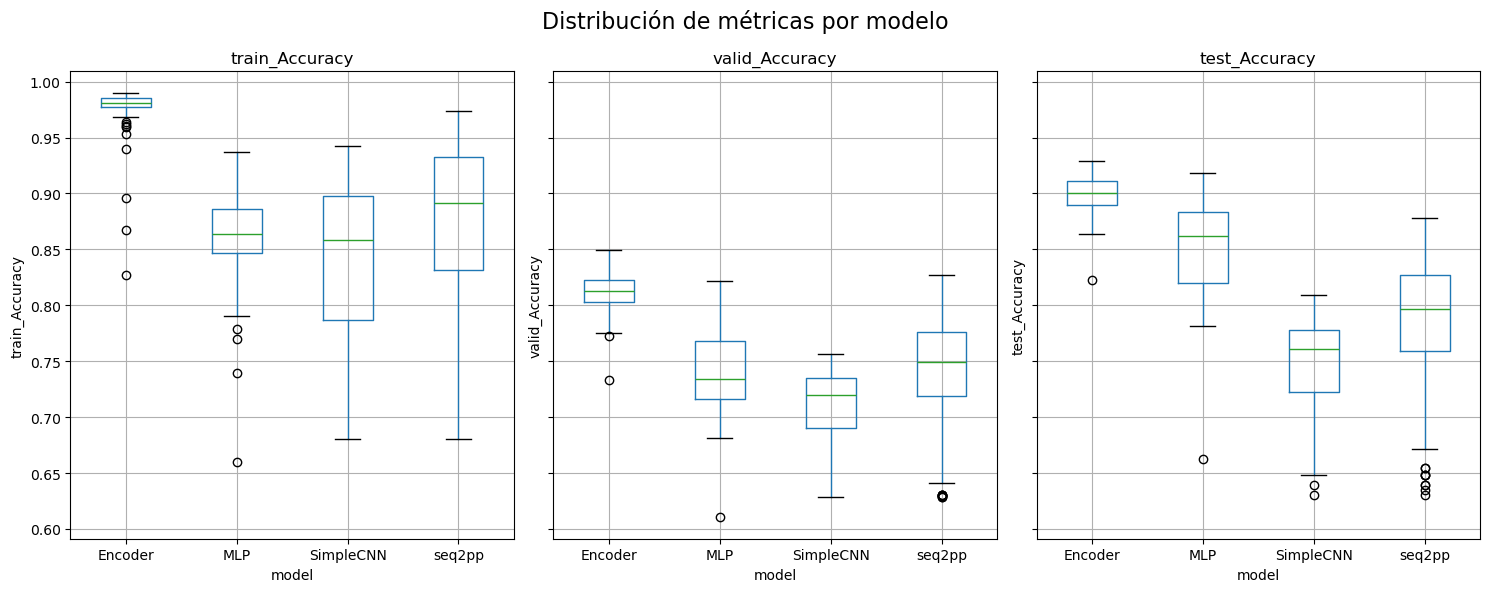

In [5]:
stats = {}
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
for i, metric in enumerate(["train_Accuracy", "valid_Accuracy", "test_Accuracy"]):

    stats[metric] = df_all.groupby("model")[metric].describe()[
        ["count", "mean", "std", "50%", "min", "max"]
    ]
    print(f"Estadísticas de {metric}")
    display(stats[metric])

    df_all.boxplot(column=metric, by="model", ax=ax[i])
    ax[i].set_title(f"{metric}")
    ax[i].set_ylabel(f"{metric}")
fig.suptitle("Distribución de métricas por modelo", fontsize=16)
fig.tight_layout()
# plt.grid()
plt.show()

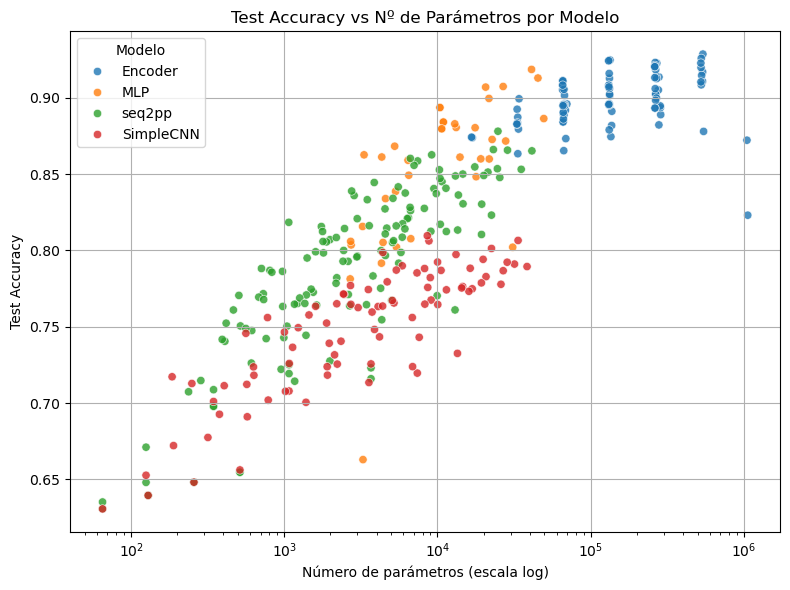

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_all, x="arc_num_params", y="test_Accuracy", hue="model", alpha=0.8
)
plt.xscale("log")
plt.xlabel("Número de parámetros (escala log)")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Nº de Parámetros por Modelo")
plt.legend(title="Modelo")
plt.tight_layout()
plt.grid()
plt.show()

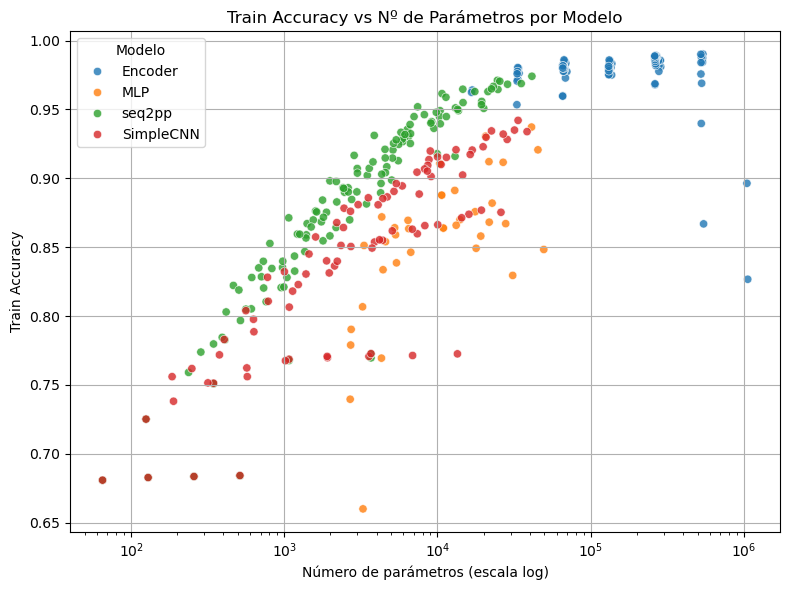

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_all, x="arc_num_params", y="train_Accuracy", hue="model", alpha=0.8
)
plt.xscale("log")
plt.xlabel("Número de parámetros (escala log)")
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy vs Nº de Parámetros por Modelo")
plt.legend(title="Modelo")
plt.tight_layout()
plt.grid()
plt.show()

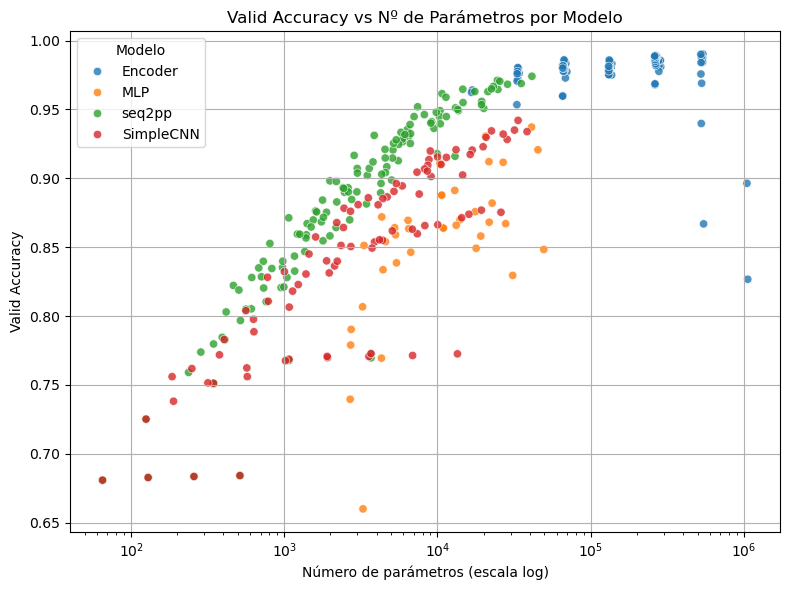

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_all, x="arc_num_params", y="train_Accuracy", hue="model", alpha=0.8
)
plt.xscale("log")
plt.xlabel("Número de parámetros (escala log)")
plt.ylabel("Valid Accuracy")
plt.title("Valid Accuracy vs Nº de Parámetros por Modelo")
plt.legend(title="Modelo")
plt.tight_layout()
plt.grid()
plt.show()

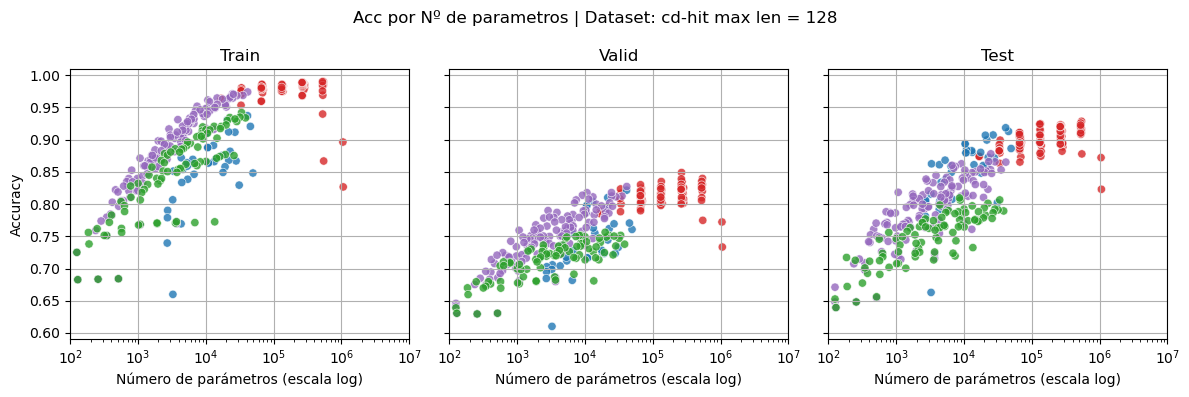

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

model_colors = {
    "MLP": "#1f77b4",  # azul
    "SimpleCNN": "#2ca02c",  # verde
    "Encoder": "#d62728",  # rojo
    "seq2pp": "#9467bd",  # púrpura
}

# Definir ejes y métricas
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True, sharex=True)
splits = ["train", "valid", "test"]
ax[0].set_xlim(100, 10**7)
for i, split in enumerate(splits):
    sns.scatterplot(
        data=df_all,
        x="arc_num_params",
        y=f"{split}_Accuracy",
        hue="model",
        palette=model_colors,
        alpha=0.8,
        ax=ax[i],
        legend=False,  # Solo el último subplot tiene leyenda
    )
    ax[i].set_xscale("log")
    ax[i].set_xlabel("Número de parámetros (escala log)")
    ax[i].set_ylabel("Accuracy")
    ax[i].set_title(split.capitalize())
    ax[i].grid()

fig.suptitle('Acc por Nº de parametros | Dataset: cd-hit max len = 128')
fig.tight_layout()
plt.show()


In [19]:
df_all['limit'] = 128
df_all.to_csv('data/join_cd-hit_limit128.csv')